In [3]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [26]:
from math import exp
# define a gaussian kernel function
def GaussianKernel(v1, v2, sigma):
    return exp(-norm(v1-v2, 2)**2/(2.*sigma**2))

# this is a simple kernel function
def simpleKernel(n1,n2,sigma):
    difference = float(n1) - float(n2)
    difference = pow(difference,2)
    difference = (-1.0*difference)/ (sigma**2)
    return exp(difference)

In [28]:
from scipy.spatial import distance

# this function is to calculate the k nearest neighbor
def K_Nearest_Neighbor(current, k, data):
    return_list = []
    index = 0
    distanceList = []
    for x in data:
        distanceList.append((distance.euclidean(current, x), x))
    distanceList.sort()
    #get the k nearest label
    for i in range (0, k):
        #append the first k smallest element
        return_list.append(distanceList[i][1])
    return return_list

In [27]:
# implement simple mean shift
import numpy as np
# random pick a point
from random import randrange

# Generate dataset
# keep the dataset the same
mu, sigma = 10, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
print "Actual mean is ", mu

Actual mean is  10


In [37]:
threshold = 0.000001
prev = 0.0
# indicate how many neighbors to look
number_of_neighbors = 500

# random choose a point
random_index = randrange(0,len(s))
# randomly initialize the mean
estimate = s[random_index]
iteration = 0
num_of_experiment = 3 # specify run the experiment how many times

for i in range(0,num_of_experiment):
    random_index = randrange(0,len(s)) # random pick a intial at the beginning every time
    estimate = s[random_index]
    iteration = 0
    print "initial estimate mean is ", estimate
    print "num of experiment is ", i
    # experiment starts
    # while less than threshold
    while abs(estimate-prev) >= threshold:
        lst = K_Nearest_Neighbor(estimate, number_of_neighbors, s)
        iteration = iteration + 1
        numerator = 0.0
        denominator = 0.0
        for i in lst:
            # apply the kernel function
            # current is from the last iteration which get the nearest neighbor
            weight = simpleKernel(estimate,i,3.0)
            numerator = numerator + weight*i
            denominator = denominator + weight
        # update mean
        prev = estimate
        estimate = numerator/denominator
        #print "in while ", estimate
    print "number of KNN ", iteration    
    print "converged mode is ", estimate

initial estimate mean is  20.7924441687
num of experiment is  0
number of KNN  38
converged mode is  19.9846262357
initial estimate mean is  7.7101589548
num of experiment is  1
number of KNN  52
converged mode is  9.62292190916
initial estimate mean is  10.2210896378
num of experiment is  2
number of KNN  24
converged mode is  9.79033234458


In [116]:
# Generate two datasets

threshold = 0.000001
prev = 0.0
# one pass of the dataset
number_of_neighbors = 1
mu, sigma = 10, 3 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
mu, sigma = 20, 3 # mean and standard deviation

s2 = np.random.normal(mu,sigma,1000)

s = list(s) + list(s2)
s = np.array(s)

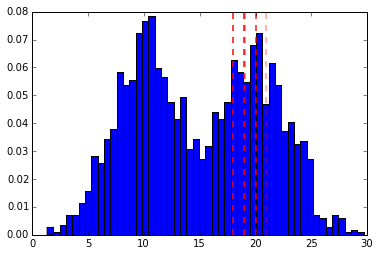

In [121]:
# graph the previous dataset
import matplotlib.pyplot as plt
# s.sort()
count, bins, ignored = plt.hist(s, 50, normed=True)
for m in result:
    plt.axvline(m, color='r', linestyle='dashed', linewidth=0.1)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [120]:
import copy
def distance_calculate(new_estimate, data_point):
    return (abs(new_estimate-data_point[1]), data_point[1])
   
result = []
for i in range(0, 100):
    data_set = list(s)
    random_index = randrange(0,len(data_set))
    estimate = data_set[random_index]
    data_set.pop(random_index)
    # print estimate
    window = []
    
#     for i in range(0, 25):
#         random_index = randrange(0,len(data_set))
#         # store a tuple of (distance, value)
#         window.append((abs(estimate-data_set[random_index]),data_set[random_index]))
#         # remove the points from the dataset
#         data_set.pop(random_index)
    estimate = 20
    for i in range(0, 25):
        # random_num = randrange(20,30)
        random_num = randrange(18,22)
        # store a tuple of (distance, value)
        window.append((abs(estimate-random_num),random_num))
        # remove the points from the dataset

    # get the current estimate
    estimate = sum([a[1] for a in window]) / len(window)
    # print "initial estimate, ", estimate

    # print estimate
    # print len(data_set)
    # print window
    tmp_list = copy.deepcopy(window)
    window = []
    for i in range(0, 25):
        window.append(distance_calculate(estimate,tmp_list[i]))
    # print estimate
    window.sort()

    for current_point in data_set:
        # if greater than the maximum in window then don't need update
        if abs(current_point - estimate) > max(window)[0]:
            continue
        else:
            #remove the maximum
            window.remove(max(window))
            window.append((abs(estimate-current_point), current_point))
        estimate = sum([a[1] for a in window]) / len(window)
        tmp_list = copy.deepcopy(window)
        window = []
        for i in range(0, 25):
            window.append(distance_calculate(estimate,tmp_list[i]))
    # print "final ", estimate
    #print window
    result.append(estimate)
print result

[19.027221405671547, 20.964333884371953, 18.009795221609291, 20.000183479928342, 19.003219146453095, 20.005369660977681, 19.006575622485197, 19.006863685247154, 18.005060833838321, 20.973136029240781, 19.016632166902891, 19.003219146453095, 20.973136029240781, 20.005369660977681, 20.006666264526721, 19.003219146453095, 19.003219146453095, 18.007510402114782, 18.007510402114782, 19.010530067573441, 20.968775487713984, 19.010530067573441, 19.006575622485197, 20.969947729286481, 19.006575622485197, 18.007302563534541, 19.003219146453095, 19.016632166902891, 18.999986907561333, 19.016632166902891, 20.973136029240781, 20.005369660977681, 19.006575622485197, 18.999986907561333, 18.999986907561333, 18.999986907561333, 20.000413689845715, 20.004961301070928, 20.007844703704283, 18.007510402114782, 18.007302563534541, 20.000413689845715, 19.003219146453095, 18.007510402114782, 18.005060833838321, 18.002543113133761, 19.019211537667381, 18.009795221609291, 20.005369660977681, 20.001710293394755,

In [36]:
# choose the first point first
estimate = s[0]

for i in range(1,len(s)):
    #sample = K_Nearest_Neighbor(estimate, number_of_neighbors, sList)
    sample = s[i]
    print "sample is ", sample
    # sList.remove(sample)
    prev = estimate
    estimate = (estimate * (i-1) + sample) / i
    print "estimate is ", estimate
print "final ", estimate    





sample is  1.25309166012
estimate is  1.25309166012
sample is  1.75817355367
estimate is  1.50563260689
sample is  2.18863763005
estimate is  1.73330094795
sample is  2.36563673603
estimate is  1.89138489497
sample is  2.3951183805
estimate is  1.99213159207
sample is  2.44617377594
estimate is  2.06780528938
sample is  2.52607331774
estimate is  2.13327215058
sample is  2.64332812135
estimate is  2.19702914692
sample is  2.68981521236
estimate is  2.2517831542
sample is  2.73357301658
estimate is  2.29996214043
sample is  2.91974821822
estimate is  2.35630632932
sample is  3.16369945821
estimate is  2.42358909006
sample is  3.30575841488
estimate is  2.4914482689
sample is  3.42691634911
estimate is  2.55826741748
sample is  3.4819581775
estimate is  2.61984680148
sample is  3.49312380117
estimate is  2.67442661396
sample is  3.61225370817
estimate is  2.72959291362
sample is  3.66251584306
estimate is  2.78142196526
sample is  3.9288175124
estimate is  2.84181120458
sample is  3.9379